<a href="https://colab.research.google.com/github/kwizzlesurp10-ctrl/Gemini-CLI-UI/blob/main/huggingimagegen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q diffusers transformers torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.7 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import login
from google.colab import userdata

# Retrieve the token from Colab secrets
hf_token = userdata.get('HF_TOKEN')

# Login to Hugging Face
login(hf_token)

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline

# Load the SDXL model
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")  # Move to GPU
pipe.enable_model_cpu_offload()  # Optimize for memory

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (83 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', uncensored, sensual.']
Token indices sequence length is longer than the specified maximum sequence length for this model (83 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', uncensored, sensual.']


  0%|          | 0/50 [00:00<?, ?it/s]

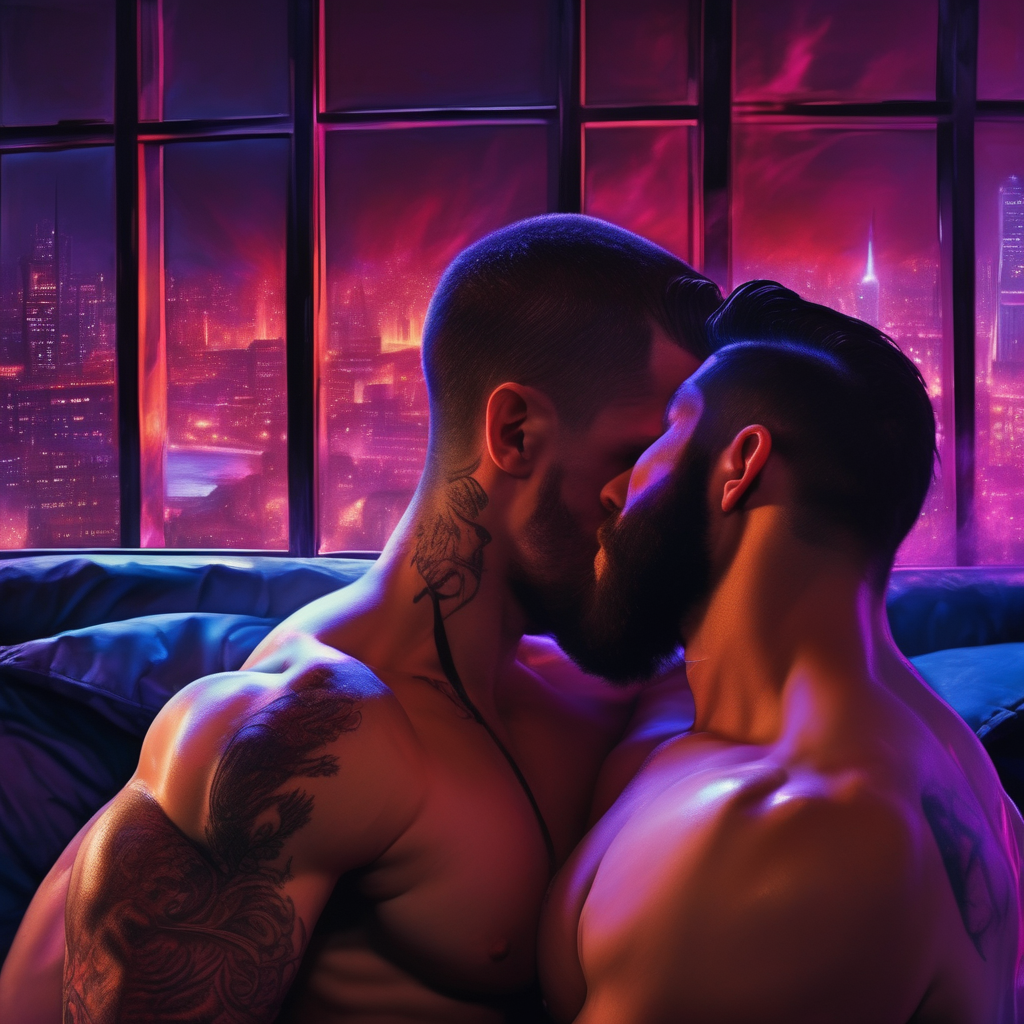

In [ ]:
from diffusers.utils import make_image_grid
import os

def generate_image(prompt, output_path="/content/drive/MyDrive/generated_image.png"):
    # Generate image
    image = pipe(
        prompt=prompt,
        num_inference_steps=50,
        guidance_scale=7.5,
        height=1024,
        width=1024
    ).images[0]
    # Save image
    image.save(output_path)
    return image

# Example prompt
prompt = "Steamy, intimate scene in a dimly lit loft with velvet curtains, black satin bed. Two muscular, tanned men—one with dark hair and beard, one with buzzcut and tattoos—in passionate embrace, bodies intertwined, sweating under neon city lights. Electric vibe, hyper-realistic, cinematic lighting, deep purples, reds, blues. NSFW, explicit, uncensored, sensual."
generated_image = generate_image(prompt)
generated_image  # Display in notebook

In [ ]:
!pip install -q ipywidgets
from ipywidgets import interact, widgets

def interactive_generate(prompt):
    output_path = f"/content/drive/MyDrive/generated_image_{prompt[:10].replace(' ', '_')}.png"
    image = generate_image(prompt, output_path)
    display(image)

interact(
    interactive_generate,
    prompt=widgets.Text(
        value="A white naked male masturbating, full body, gay porn, gang of men souletted in background",
        placeholder="Enter your prompt",
        description="Prompt:",
        layout={'width': '600px'}
    )
)

interactive(children=(Text(value='A white naked male masturbating, full body, gay porn, gang of men souletted …

<function __main__.interactive_generate(prompt)>

In [ ]:
pipe.safety_checker = None

In [ ]:
def generate_image(prompt, negative_prompt="", num_inference_steps=30, guidance_scale=7.5):
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale
    ).images[0]
    output_path = f"/content/drive/MyDrive/generated_image_{prompt[:10]}.png"
    image.save(output_path)
    return image, output_path

In [ ]:
import gradio as gr

def gradio_generate(prompt, negative_prompt, steps=30, guidance=7.5):
    image, path = generate_image(prompt, negative_prompt, steps, guidance)
    return image, f"Saved to {path}"

# Define Gradio interface
interface = gr.Interface(
    fn=gradio_generate,
    inputs=[
        gr.Textbox(label="Prompt", placeholder="Enter your image description"),
        gr.Textbox(label="Negative Prompt", placeholder="Enter what to avoid"),
        gr.Slider(label="Inference Steps", minimum=10, maximum=50, value=30, step=1),
        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7.5, step=0.5)
    ],
    outputs=[gr.Image(label="Generated Image"), gr.Text(label="Output Path")],
    title="Stable Diffusion XL Image Generator",
    description="Generate high-quality images from text prompts using SDXL."
)

# Launch the interface
interface.launch(share=True)  # Use share=True for a public URL (limited by Colab’s free tier)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3a2a0056c285faba27.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from IPython.display import clear_output
clear_output()